In [0]:
import os, sys

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_banknote.txt", header=None)
df.head()
df.info() 
headers = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df.columns = headers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
df0 = df[df['class'] == 0]
df1 = df[df['class'] == 1]
x0, test0 = train_test_split(df0, test_size=0.2, random_state=2)
x1, test1 = train_test_split(df1, test_size=0.2, random_state=2)

In [11]:
x0.head()

,variance,skewness,curtosis,entropy,class
327,4.21640,9.4607,-4.9288,-5.236600,0
484,4.74320,2.1086,0.1368,1.654300,0
445,3.18870,-3.4143,2.7742,-0.202600,0
558,4.38460,-4.8794,3.3662,-0.029324,0
182,-0.69572,8.6165,1.8419,-4.328900,0


In [0]:
train = x0.append(x1)
test_set = test0.append(test1)
train.sample(frac=1)
train = train.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

train_labels = train.pop('class')
test_labels  = test_set.pop('class')

In [13]:
test_set.head()

,variance,skewness,curtosis,entropy
0,2.97420,8.96000,-2.90240,-1.037900
1,-0.10648,-0.76771,7.75750,0.641790
2,2.97360,8.79440,-3.63590,-1.375400
3,5.85190,5.39050,-2.40370,-0.061652
4,1.00090,7.78460,-0.28219,-2.660800


In [0]:
train_stats = train.describe().transpose()

In [15]:
train_stats

,count,mean,std,min,25%,50%,75%,max
variance,1097.0,0.444197,2.848433,-7.0421,-1.7490,0.54777,2.80840,6.8248
skewness,1097.0,1.914015,5.837236,-13.6779,-1.7051,2.40660,6.79340,12.9516
curtosis,1097.0,1.367067,4.278036,-5.2861,-1.5195,0.57551,3.08950,17.6772
entropy,1097.0,-1.182465,2.086060,-7.7853,-2.4099,-0.57760,0.38576,2.4495


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
train_dataset = norm(train)
test_dataset = norm(test_set)

In [17]:
train_dataset.describe()

,variance,skewness,curtosis,entropy
count,1.097000e+03,1.097000e+03,1.097000e+03,1.097000e+03
mean,7.598500e-16,6.082443e-17,-2.160735e-16,4.979305e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.628216e+00,-2.671113e+00,-1.555192e+00,-3.165218e+00
25%,-7.699660e-01,-6.200050e-01,-6.747410e-01,-5.883985e-01
50%,3.636152e-02,8.438665e-02,-1.850280e-01,2.899559e-01
75%,8.300013e-01,8.359067e-01,4.026224e-01,7.517643e-01
max,2.240040e+00,1.890892e+00,3.812528e+00,1.741065e+00


In [18]:
model = keras.Sequential([
  keras.layers.Dense(64, activation = 'relu', input_shape = [4]),
  keras.layers.Dense(64, activation = 'relu'),
  keras.layers.Dense(2)            
])

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy', 'mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.46344775, -0.26584888],
       [-0.13924064,  0.20597783],
       [-0.14219353,  0.07488693],
       [-0.19982329,  0.08675601],
       [-0.37786794, -0.05837184],
       [-0.36394665,  0.06990317],
       [-0.08532093,  0.07671492],
       [-0.11517344, -0.07453616],
       [-0.01223138,  0.03156818],
       [-0.09415816,  0.12570776]], dtype=float32)

In [0]:
EPOCHS = 250

history = model.fit(
    train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose = 1
)

Text(0.5, 1.0, 'Loss')

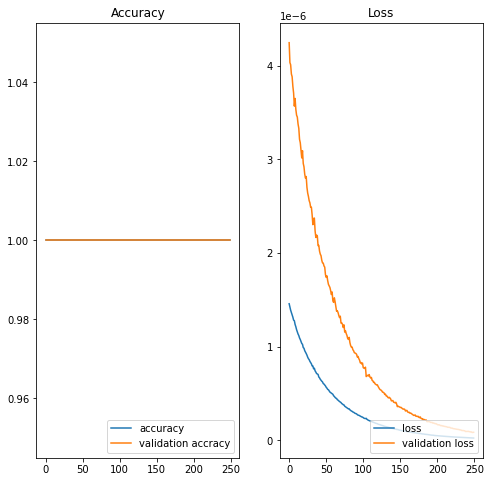

In [22]:
# make plots
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='accuracy')
plt.plot(epochs_range, val_acc, label='validation accracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='lower right')
plt.title('Loss')

In [0]:
preds = model.predict(test_dataset)

In [0]:
predict_labels = []

In [0]:
for i in range(len(preds)):
  predict_labels.append(np.argmax(preds[i]))

In [0]:
goodcnt = 0
badcnt = 0
for i in range(len(predict_labels)):
  if predict_labels[i] == test_labels[i]:
    goodcnt += 1
  else:
    badcnt += 1

In [28]:
goodcnt

275

In [29]:
badcnt

0